## Download files for the Bluebook for Bulldozers Competition (Milestone Project 2)

You can download the files (in the form of a zip folder) to your local machine using this link:
* [Download all Bluebook for Bulldozers data in zip format](https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip)

Or you can run the following code in a Jupyter Notebook or Google Colab cell.

**Note:** If you're using Colab, the files will get downloaded to termporary storage and will be deleted when the Colab notebook times out, meaning, you will have to redownload them.

In [ ]:
# Getting the data
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2024-10-14 17:13:16--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2024-10-14 17:13:16--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72042477 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip’

bluebook-for-bulldo 100%[===================>]  68.70M   152MB/s    in 0.5s    

2024-10-14 17:13:18 (152

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Prediciting the Sale Price of Bulldozers using Machine Learning  🚜

In this notebook, we are going to go through an example of ML project with the goal of predicting the sale price of bulldozers.

## 1. Problem Defintion
> how well can future sale price of a bulldozer can be predicited given the charactersitics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

Downloaded from Kaggle competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.*

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note: goal is to minizing the error i.e. a model that minimizes RMSLE

## 4. Fearures (knowing different parts of the data)

Kagel has provided a detailed data dictionary in excel form

In [ ]:
# Import Training and Validation sets

from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()



Saving TrainAndValid.csv to TrainAndValid.csv


<ipython-input-3-75a434e250d7>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


Lets try to visualize the data to make more sense out ot it

b/c we know its timeseries, we can compare sales date with sale price

we can do this for 1000 values to keep computer capacity in consideration

Text(0.5, 0, 'saledate')

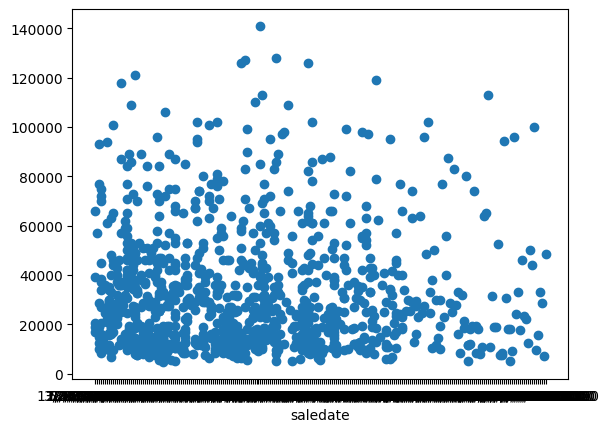

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel("saledate")

<Axes: ylabel='Frequency'>

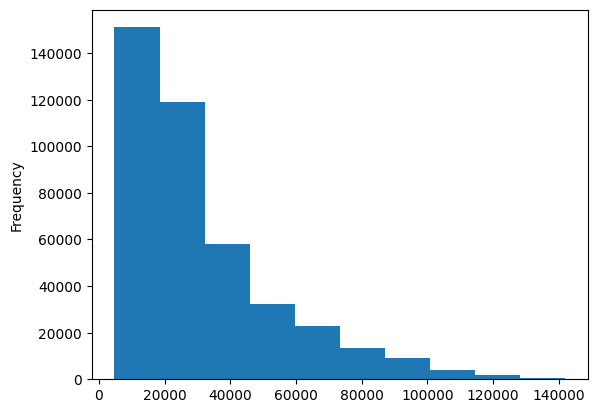

In [ ]:
df.SalePrice.plot.hist()

**NOte:** most of the data is concentraded below $20k

In [ ]:
df.saledate[:100]

,saledate
0,11/16/2006 0:00
1,3/26/2004 0:00
2,2/26/2004 0:00
3,5/19/2011 0:00
4,7/23/2009 0:00
...,...
95,12/15/2005 0:00
96,1/29/2004 0:00
97,9/18/2008 0:00
98,11/3/2005 0:00


dates are in dtype object. we need to convert it to parsing dates

### Parsing Dates

Wehn working with time series data, bests to have time and date in parsing format by telling np numpy the time and date column i.e. TImestamp

parameter: parse_dates

In [ ]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce') # i.e. convertiong the dates column into parse date format

In [ ]:
df.saledate[:100]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
95,2005-12-15
96,2004-01-29
97,2008-09-18
98,2005-11-03


Note now dtyoe is change toi datetime64[ns] vs object the previous one

Text(0.5, 0, 'saledate')

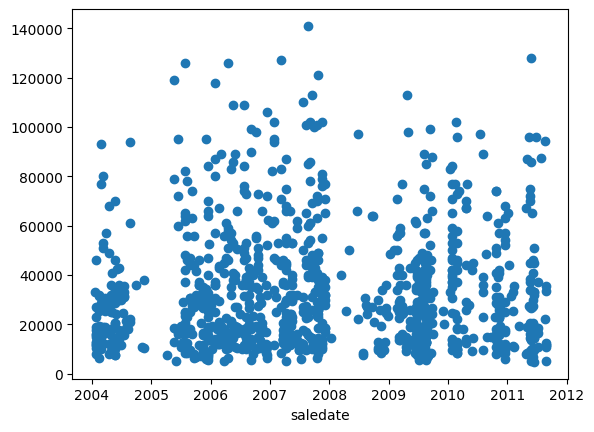

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel("saledate")

Note how clear the scatter plot is and now has proper years vs just the junmpled stuff in the previous one.

We can clearly see which years sales were better etc.

Text(0.5, 1.0, 'Sale Price by Sale Date')

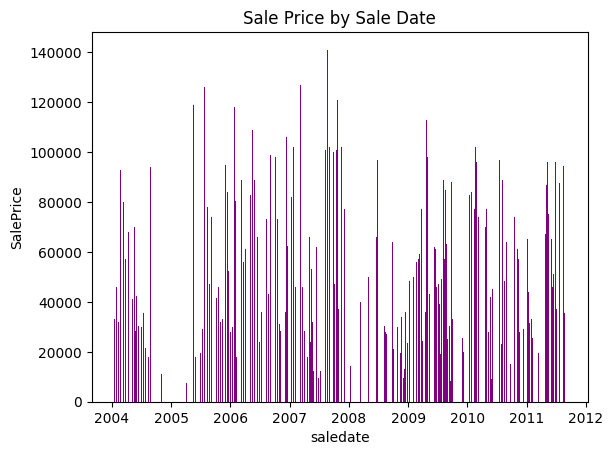

In [ ]:
fig, ax = plt.subplots()
ax.bar(df["saledate"][:1000], df["SalePrice"][:1000], color='purple', width=5)  # Adjust width for thicker bars
ax.set_xlabel("saledate")
ax.set_ylabel("SalePrice")
ax.set_title("Sale Price by Sale Date")


In [ ]:
df.head().T # to ensure all the columns are visible

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort datafram for sale date
* when using timeseries, its a good idea to have data sorted

In [ ]:
df.sort_values(by="saledate", inplace= True, ascending=True)
df.saledate.head(20)


,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


### Make copy of orginal DataFrame

* good to have orignal data so if something goes wrong, original data is always at hand

In [ ]:
# Make a copy
df_temp = df.copy()
df_temp.saledate.head(20)

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


### **Feature Engineering**

#### Add Date Time Paraemets to the saledate columb

* pandas datatime Index has bunch of parameters/attribiutes

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

* you can see that it already has built in featuers like start of quarter end of quearter start of year etc.
* these can all be very importabnt to understand why or when sales are seeing a change

In [ ]:
df_temp['sale_year'] = df_temp.saledate.dt.year # so we are extracting the year from the date time column

In [ ]:
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear
df_temp['sale_year'] = df_temp.saledate.dt.year

In [ ]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
# Now we have enriched the dataframe, oroginal date column is not needed anymore
df_temp.drop(columns='saledate', inplace=True)

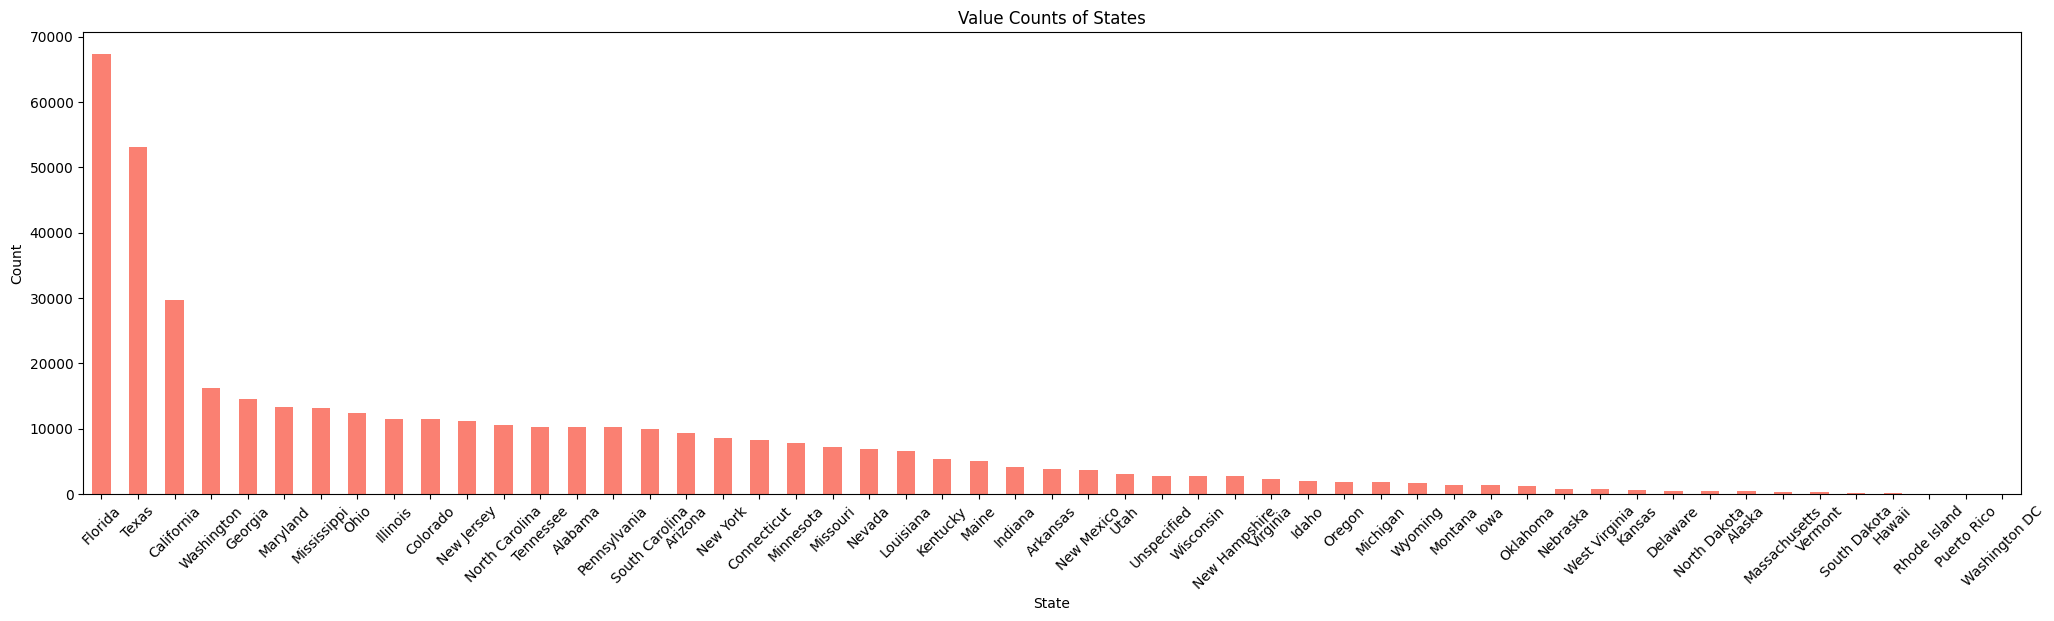

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts of the 'state' column
state_counts = df_temp['state'].value_counts()

# Create a wider plot to spread out the x-axis labels
fig, ax = plt.subplots(figsize=(25, 6))  # Increase the width (25) to make it more spread out
state_counts.plot(kind='bar', color='salmon', ax=ax)

# Set labels and title
ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("Value Counts of States")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


## 5. Modelling

EDA can always continue but its best to do some Model Driven EDA because we have some good sense of the basic data so far

* So we know that we are goingt to use RandomForest regressor for brediciting the price

In [ ]:
# lets build a ML model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42 # this is same as putting np.random.seed(42)
                              )
model.fit(df_temp.drop(columns='SalePrice'), df_temp['SalePrice'])

ValueError: could not convert string to float: 'Low'

Note: it did not work b/c most of the data is in string format and not objec/int. So model is not working on it.
Additionally we also have a lot of missing values

So both these needs to be taken care of

### **Convert String to Categories**
One way we can turn all of our data into numbers is by converting them into pandas categories .

https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

Link tells differnet datatypes which are compatible with pandas

In [ ]:
# Find the columns which contain strings
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [ ]:
# Find all columns that are of object type, including those that might be categorical
for label, content in df_temp.items():
    if content.dtype == 'object':
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


not lets convenrt all these string valyues into categories

In [ ]:
for label, content in df_temp.items():
  if pd.api.types.is_object_dtype(content):
    df_temp[label] = content.astype('category').cat.as_ordered() # so this is keeping the same column name but is changing the contnet as categoy

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [ ]:
df_temp.state.cat.categories #.cat is needed to access the categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

So we can see that the data is now converted from strings to categories i.e. each vale is being treade as a numbner now

Thanks to pandas categories, we can access all the data in the form of datas.

But we still have bunch of missind data

In [ ]:
# Calculate the percentage of missing values for each column
null_percentage = (df_temp.isnull().sum() / len(df_temp)) * 100

# Round to two decimal places and sort in descending order
null_percentage = null_percentage.round(2).sort_values(ascending=False)

# Display the result
print(null_percentage)



Blade_Width                 93.70
Engine_Horsepower           93.70
Tip_Control                 93.70
Scarifier                   93.70
Pushblock                   93.70
Blade_Extension             93.70
Enclosure_Type              93.70
Hydraulics_Flow             89.13
Grouser_Tracks              89.13
Coupler_System              89.10
fiModelSeries               85.78
Steering_Controls           82.67
Differential_Type           82.66
UsageBand                   82.15
fiModelDescriptor           81.87
Backhoe_Mounting            80.44
Stick                       80.35
Turbocharged                80.35
Pad_Type                    80.35
Blade_Type                  80.16
Travel_Controls             80.16
Tire_Size                   76.34
Track_Type                  75.24
Grouser_Type                75.24
Stick_Length                75.22
Pattern_Changer             75.22
Thumb                       75.20
Undercarriage_Pad_Width     75.06
Ripper                      74.09
Drive_System  

### Save to new csv so we can alaywas start from here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Export current DataFrame to Google Drive
df_temp.to_csv('/content/drive/My Drive/train_tmp.csv', index=False)

# so we can always improt this file moving on

In [ ]:
# Importing Saved Csv file
from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame
df_temp = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df_temp.head()

Saving train_tmp.csv to train_tmp (1).csv


<ipython-input-6-901a7c4c470a>:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_name)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_year,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## **Fill Missing Values**

## Lets start working with numeric columns first

In [ ]:
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
sale_year
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
df_temp.ModelID

,ModelID
0,8434
1,10150
2,4139
3,8591
4,4089
...,...
412693,5266
412694,19330
412695,17244
412696,3357


In [ ]:
# Check for which numeric columbs have null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Loop through columns with missing values
for column in df_temp.columns:
    if df_temp[column].isnull().any() and pd.api.types.is_numeric_dtype(df_temp[column]):
        # Create a binary column indicating whether the value was originally missing
        df_temp[column + '_is_missing'] = df_temp[column].isnull().astype(int)

        # Fill missing values with the median of the column
        df_temp[column] = df_temp[column].fillna(df_temp[column].median())


In [ ]:
# Check if there is any null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
# Checkt o see what binary column did
# so in binary coumn for auctioneer the true should be equal to the orignal mssing values i.e. 20136 values

df_temp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
0,392562
1,20136


In [ ]:
df_temp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,339028
fiModelDesc,0


### ***Filling and turning categorical variables into numbers***

In [ ]:
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):  # Check if the column is not numeric
        if pd.isnull(content).sum():  # Check if the column contains any missing values
            print(label)


UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
pd.Categorical(df_temp.state).codes


array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

**Note:** so you see the categories are conversted into numbers

In [ ]:
# turn categorical varaibles into numbers and fill missing values
# for label, content in df_temp.items():
    # if not pd.api.types.is_numeric_dtype(content):  # Check if the column is not numeric
        # if pd.isnull(content).sum():  # Check if the column contains any missing values
            # df_temp[label + '_is_missing'] = pd.isnull(content).astype('int')
           # df_temp[label] = pd.Categorical(content).codes+1

In [ ]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):  # Check if the column is not numeric
        # Add binary column to indicate whether the sample had missing value or not
        df_temp[label + "_is_missing"] = pd.isnull(content).astype(int)
        # Turn categories into numbers and add 1 to avoid -1 for missing values
        df_temp[label] = pd.Categorical(content).codes + 1


In [ ]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,0.0,1.0,0.0,1.0,0.0
Blade_Type_is_missing,0.0,1.0,0.0,1.0,0.0
Travel_Controls_is_missing,0.0,1.0,0.0,1.0,0.0
Differential_Type_is_missing,1.0,0.0,1.0,0.0,1.0


In [ ]:
df_temp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
Backhoe_Mounting_is_missing,0
Blade_Type_is_missing,0
Travel_Controls_is_missing,0
Differential_Type_is_missing,0


In [ ]:
# Check if all columns are numeric
are_all_numeric = df_temp.apply(pd.api.types.is_numeric_dtype)

if are_all_numeric.all():
    print("All columns are numeric.")
else:
    non_numeric_columns = are_all_numeric[~are_all_numeric].index
    print("There are non-numeric columns:")
    print(non_numeric_columns)


All columns are numeric.


In [ ]:
# Check for missing values in the DataFrame
missing_values = df_temp.isnull().sum()

# Filter to show only columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("There are no missing values in the dataset.")
else:
    print("Missing values found in the following columns:")
    print(missing_columns)


There are no missing values in the dataset.


**Note:**

* no more missing values
* all numeric data

## **Start Building Machine Learning Model**

* Remember Goal: Find patterns in the data to predict sales price

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time

# Measure start time
start_time = time.time()

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model (make sure to drop "SalePrice" from the features)
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

# Measure end time
end_time = time.time()

# Print elapsed time
print(f"Elapsed time: {end_time - start_time:.2f} seconds")


Elapsed time: 835.18 seconds


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42 # this is same as putting np.random.seed(42)
                              )
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

UsageError: Line magic function `%%time` not found.


so it means that wal time was 15 mins so it took 15 mins to go through 412698 rows

so how can we improve this? because if the rows keep getting more and more the time will be even longer.

In [ ]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"]) # for regression the default score metrics is R-squared

0.9875427738877347

* this an awesome score but why is this metric not ho;lding water?
  * its because there was no split or test. We just tested the model on the exact same data on which it was tested


## **Splitting data into train/validation sets**

* so we are creating our own validation set
* as per kagel guidelines:
  * Train: all the data upto end of 2011
  * Valid: all the data from 01/01/12 - 04/30/2012
  * Test: Data from May onwards



In [ ]:
df_temp.sale_year.value_counts()

,count
sale_year,
2009,43849
2008,39767
2011,35197
2010,33390
2007,32208
2006,21685
2005,20463
2004,19879
2001,17594


In [ ]:
# Split data into valid and train
df_val = df_temp[df_temp.sale_year == 2012]
df_train = df_temp[df_temp.sale_year != 2012]

In [ ]:
len(df_val), len(df_train)

(11573, 401125)

In [ ]:
# Split data into X and Y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape  # to make sure there are no errors in what we have done so far

((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
y_train.head()

,SalePrice
0,9500.0
1,14000.0
2,50000.0
3,16000.0
4,22000.0


* So note we need RSMLE (Root mean square log error) as model metric and not just R-squared

### **Building on evaluation function**

In [ ]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# note sklearn has mean_squared_log_error alreayd but it doesnt have the root in it.
# so we need to add it

def rmsle(y_test, y_preds):
  """
  calculates root mean squared log error between predictions and true labels
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# lets caclaute an evalation function so model can be evaluated on few different levels
def show_scores(model):
  train_preds = model.predict(X_train) #evalute how the model did on training data
  val_preds = model.predict(X_valid) # evalaute how the model did on validation data
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores

## Testing our model on subset to tune hyperparameters

* goal is to decrease thet ime and have the best model at the same time

In [ ]:
# # if below code is run this will take forever and we know that

#%%time
#model = RandomForestRegressor(n_jobs=-1,
    #                          random_state=42 # this is same as putting np.random.seed(42)
                 #             )
#model.fit(X_train, y_train)

In [ ]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000) # the number of samples to draw from X to train each estimator i.e now only 10,000 samples will go through each estimator. We know that default number of estiamtors is 100

In [ ]:
%%time
# Cutting down on the max number of samples each estimaor can import
model.fit(X_train, y_train)

CPU times: user 46.5 s, sys: 186 ms, total: 46.7 s
Wall time: 29.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

**Note:** walltime is significantly better now

In [ ]:
show_scores(model)

{'Training MAE': 5561.904222648801,
 'Valid MAE': 7182.675623433855,
 'Training RMSLE': 0.2578097601705908,
 'Valid RMSLE': 0.2938666119438854,
 'Training R^2': 0.8606561172874538,
 'Valid R^2': 0.8320644509010875}

**Note:** Validation error is slightly higher thant the training which means we are not overfitting

* AS WE CAN experiment faster, we can improve the parameters

## **HYperparameter tuning with RandomizedSearch CV**

* RandomizedSearchCV is going to take our model, the estimator, and search across this param_distributions i.e the dictionary for the best hyperparameters for our model


In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=5,  # Number of iterations for the random search
    cv=5,  # 5-fold cross-validation
    verbose=True
)

# Fit the RandomizedSearchCV Model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

CPU times: user 28.3 s, sys: 726 ms, total: 29 s
Wall time: 22.1 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Find the best moodel hyperparamets
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [ ]:
# Evaluate the RandomizedSearch Model
show_scores(rs_model)

{'Training MAE': 11975.938123754975,
 'Valid MAE': 14061.192999014474,
 'Training RMSLE': 0.5171962605987205,
 'Valid RMSLE': 0.5367742285822671,
 'Training R^2': 0.4677420725950444,
 'Valid R^2': 0.4471070675493126}

if n_iter is set to 100, it makes the hyperparamets even better but takes 2 hrs to run

In [ ]:
# Import the RandomForestRegressor class from sklearn
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# trying with the ideal hyperparamets
# Most ideal hyperparams
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_split=14,
                                    min_samples_leaf=1,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 3min 59s, sys: 833 ms, total: 4min
Wall time: 2min 28s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [ ]:
# Checking scores test 2
show_scores(ideal_model)

{'Training MAE': 2951.5558873978152,
 'Valid MAE': 5953.396556983143,
 'Training RMSLE': 0.14464014469574377,
 'Valid RMSLE': 0.24495161621547118,
 'Training R^2': 0.9588560332057796,
 'Valid R^2': 0.8814901850998738}

In [ ]:
show_scores(ideal_model)

{'Training MAE': 2963.2446934159548,
 'Valid MAE': 5950.267385044922,
 'Training RMSLE': 0.14504222579204026,
 'Valid RMSLE': 0.24666109363907673,
 'Training R^2': 0.9586047121739181,
 'Valid R^2': 0.8825601186832677}

* we can see that the ideal model is giving best Valid RMSLE score

## **Make Predictions on Dataset**

In [ ]:
# Import the test data
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame, and parse the 'saledate' column as dates
df_test = pd.read_csv(file_name, parse_dates=['saledate'])

# Display the first few rows of the DataFrame
df_test.head()



Saving Test.csv to Test (3).csv


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


* Make Predictions on the test dataset

* we cant make it right away b/c the test data is not in the same format as the training data

### Pre-Processing the data to bring data in the same format

In [ ]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["sale_year"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [ ]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Ensure 'saledate' is in datetime format
    df['saledate'] = pd.to_datetime(df['saledate'])

    # Extract date features
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    df['sale_year'] = df.saledate.dt.year

    # Drop 'saledate' column
    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):  # Check if the column is numeric
            if pd.isnull(content).sum():  # Check if there are missing values
                df[label + '_is_missing'] = pd.isnull(content).astype('int')  # Create a binary column indicating missing values
                df[label] = content.fillna(content.median())  # Fill missing values with the median

        # Turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            df[label + '_is_missing'] = pd.isnull(content).astype('int')  # Create binary column for missing values
            df[label] = pd.Categorical(content).codes + 1  # Convert categories to numbers

    return df


In [ ]:
# process test data
df_test_p = preprocess_data(df_test)
df_test_p.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,1,1,1,1,1,0,0,0,1,1
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,1,1,1,1,1,1,1,1,0,0
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,1,1,1,1,1,0,0,0,1,1
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,1,1,1,1,1,1,1,1,0,0
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,1,1,1,1,1,0,0,0,1,1


In [ ]:
# Print all column names in a list format
all_columns = df_test_p.columns.tolist()
print(all_columns)


['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'sale_year', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear', 'MachineHoursCurrentMeter_is_missing', 'UsageBand_is_missing', 'fiModelDesc_is_missing', 'fiBaseModel_is_missing', 'fiSec

In [ ]:
# Print all column names in a list format
all_columns = X_train.columns.tolist()
print(all_columns)


['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'sale_year', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear', 'auctioneerID_is_missing', 'MachineHoursCurrentMeter_is_missing', 'UsageBand_is_missing', 'fiModelDesc_is_missing', 'fiBa

In [ ]:
# We can find how the columnns diff using pythjiong set
set(X_train.columns) - set(df_test_p.columns)

set()

In [ ]:
# Display the first few rows of the 'auctioneerID_is_missing' column
X_train['auctioneerID_is_missing'].head()


,auctioneerID_is_missing
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Display the first few rows of the 'auctioneerID_is_missing' column
df_test_p['auctioneerID'].head()


,auctioneerID
0,3
1,3
2,3
3,3
4,3


In [ ]:
X_train['auctioneerID'].head()


,auctioneerID
0,18.0
1,99.0
2,99.0
3,99.0
4,99.0


as the types are differnet in train data and test data, we will make both types same

In [ ]:
# Convert 'auctioneerID' column from int to float
df_test_p['auctioneerID'] = df_test_p['auctioneerID'].astype(float)

# Verify the conversion
print(df_test_p['auctioneerID'].head())
print(df_test_p['auctioneerID'].dtype)  # Check the data type to confirm


0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: auctioneerID, dtype: float64
float64


In [ ]:
# Check for missing values in 'auctioneerID' column
missing_values = df_test_p['auctioneerID'].isnull().sum()

print(f"Number of missing values in 'auctioneerID': {missing_values}")


Number of missing values in 'auctioneerID': 0


In [ ]:
import pandas as pd

# Step 1: Create the auctioneerID_is_missing column with zeros
df_test_p['auctioneerID_is_missing'] = 0




In [ ]:
# Step 1: Remove the auctioneerID_is_missing column
auctioneer_missing_col = df_test_p.pop('auctioneerID_is_missing')

# Step 2: Define the position to insert the column
# Find the index of the column 'MachineHoursCurrentMeter_is_missing'
insert_position = df_test_p.columns.get_loc('MachineHoursCurrentMeter_is_missing')

# Step 3: Insert the auctioneerID_is_missing column at the specified position
df_test_p.insert(insert_position, 'auctioneerID_is_missing', auctioneer_missing_col)

# Verify that the column has been moved correctly
print(df_test_p.head())
print(df_test_p.columns)  # Check the order of columns


   SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121           3.0      1999   
1  1227844    1022817     7271         121           3.0      1000   
2  1227847    1031560    22805         121           3.0      2004   
3  1227848      56204     1269         121           3.0      2006   
4  1227863    1053887    22312         121           3.0      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  \
0                    3688.0          2          499          180   
1                   28555.0          1          831          292   
2                    6038.0          3         1177          404   
3                    8940.0          1          287          113   
4                    2286.0          2          566          196   

   fiSecondaryDesc  fiModelSeries  fiModelDescriptor  ProductSize  \
0               25              0                  0            0   
1                0              

In [ ]:
df_test_p

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_year,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3.0,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,0,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3.0,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,0,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3.0,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3.0,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3.0,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,0,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### **Fianlly both test and train data have same features so we can use the model to make predictions**

In [ ]:
# make predictions on test data
test_preds = ideal_model.predict(df_test_p)

**Changing format to same as Kaggle**

In [ ]:
# Format Predictions into the same preidicts as Kaggle
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test_p["SalesID"]
df_preds["SalePrice"] = test_preds

In [ ]:
df_preds

,SalesID,SalePrice
0,1227829,18420.387794
1,1227844,15741.255524
2,1227847,49660.773453
3,1227848,67435.180443
4,1227863,59060.313798
...,...,...
12452,6643171,38445.155353
12453,6643173,11631.517991
12454,6643184,12488.735880
12455,6643186,16349.468928


**So we can now export this prediction in csv format**

### **Feature Importance**

Feature importance seeks to figure out which attributes were most significant in predicting the prices

In [ ]:
# Find feature improtnace of our best model
len(ideal_model.feature_importances_)

102

So we are getting an importnace of each column here to see how important ti was

In [ ]:
# Lets make it visual

# Function to plot feature importance
def plot_feature_importance(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
  # Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:20])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature Importance")
  ax.set_title("Feature Importance")
  ax.invert_yaxis()
  plt.tight_layout()
  plt.show()

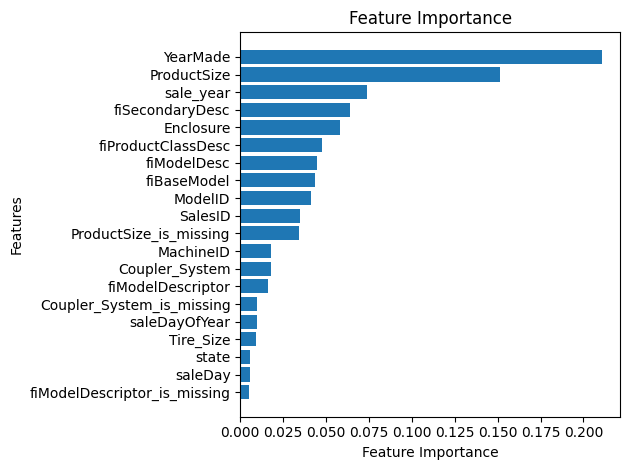

In [ ]:
plot_feature_importance(X_train.columns, ideal_model.feature_importances_)